In [2]:
import numpy as np
from scipy.ndimage import zoom
from tqdm import tqdm

n_round=4
point_per_round=90

alpha_array=np.linspace(0,n_round*180,point_per_round*n_round+1,dtype=np.float32)[:-1]
img_array=np.zeros((alpha_array.shape[0],40,40),dtype=np.float32)
for i in tqdm(range(n_round)):
    cur_npz=np.load("./LD_img/round%d.npz"%i)["arr_0"]
    for j in range(point_per_round):
        img_array[i*point_per_round+j]=zoom(cur_npz[j].astype(np.float32),(40/cur_npz[j].shape[0],40/cur_npz[j].shape[1]))
img_array=img_array/np.mean(img_array,axis=0)
np.save("./processed.npy",img_array)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.17s/it]


In [3]:
import numpy as np

n_round=2
point_per_round=90

alpha_array=np.linspace(0,n_round*180,point_per_round*n_round+1,dtype=np.float32)[:-1]
img_array=np.load("./processed.npy")[:n_round*point_per_round]-1


22.0


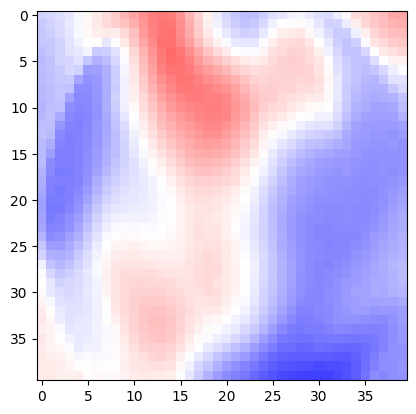

In [4]:
import matplotlib.pyplot as plt
i=11
cur=np.copy(img_array[i])
#cur[25,10]=0
plt.imshow(cur,cmap="bwr",vmin=-0.5,vmax=0.5)
print(alpha_array[i])

In [5]:
for i in range(10,35):
    for j in range(5,20): 
        cur_y=img_array[:,i,j]
        if np.abs((alpha_array[np.argmax(cur_y)]*2)%180-45)<7:
            print(i,j)


26 13
29 12
30 12
31 12
32 12
33 12
34 12


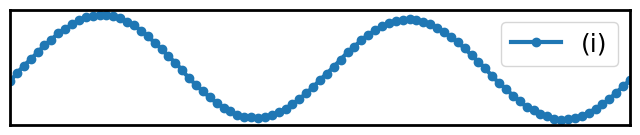

In [6]:
plt.figure(figsize=(8, 1.5))
cur_y=img_array[:,3,13]
plt.plot(alpha_array*2,cur_y,"o-",lw=3,label="(i)")
plt.xlim(0,360)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=18,loc=1)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)

plt.savefig("./point_a.svg",transparent=True)

plt.show()



<Figure size 640x480 with 0 Axes>

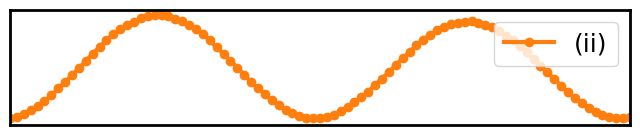

In [7]:

plt.tight_layout()
plt.figure(figsize=(8, 1.5))
cur_y=img_array[:,30,20]
plt.plot(alpha_array*2,cur_y,"o-",color="tab:orange",lw=3,label="(ii)")
plt.xlim(0,360)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=18,loc=1)
#plt.ylabel("Transmittance",fontsize=24)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)

plt.savefig("./point_b.svg",transparent=True,bbox_inches="tight")

plt.show()



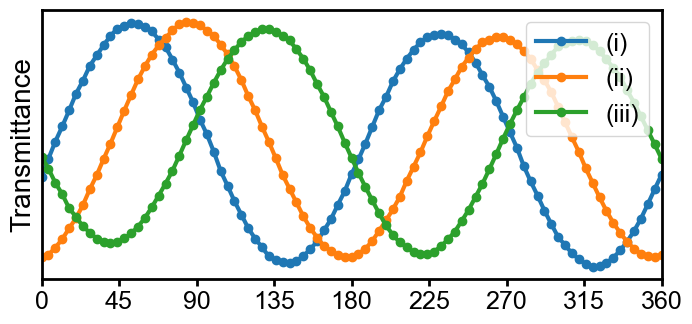

In [9]:
plt.figure(figsize=(8, 3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
cur_y=img_array[:,3,13]
plt.plot(alpha_array*2,cur_y,"o-",lw=3,label="(i)")

cur_y=img_array[:,30,20]
plt.plot(alpha_array*2,cur_y,"o-",color="tab:orange",lw=3,label="(ii)")
cur_y=img_array[:,25,30]
plt.plot(alpha_array*2,cur_y,"o-",color="tab:green",lw=3,label="(iii)")
plt.xlim(0,360)
plt.xticks([0,45,90,135,180,225,270,315,360])
plt.yticks([])
plt.legend(fontsize=18,loc=1)
plt.xticks(fontsize=18)
plt.ylabel("Transmittance (au)",fontsize=20)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)

plt.savefig("./all.svg",transparent=True)
plt.show()



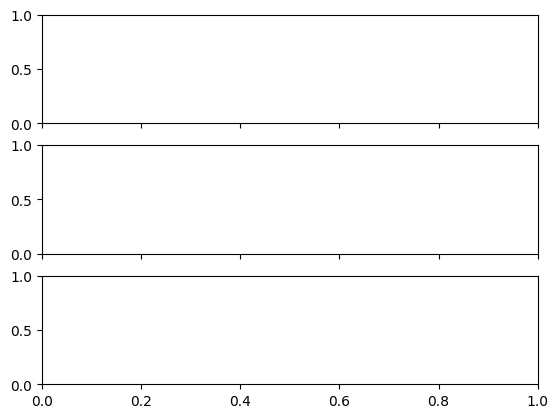

In [4]:
plt.figure(figsize=(8, 1.5))
cur_y=img_array[:,25,30]
plt.plot(alpha_array*2,cur_y,"o-",color="tab:green",lw=3,label="(iii)")
plt.xlim(0,360)
plt.xticks([0,45,90,135,180,225,270,315,360])
plt.yticks([])
plt.legend(fontsize=18,loc=1)
plt.xticks(fontsize=18)

bwidth=2
plt.tick_params(which="major",width=bwidth,length=5)
plt.tick_params(which="minor",width=bwidth,length=3)
tk=plt.gca()
tk.spines["bottom"].set_linewidth(bwidth)
tk.spines["top"].set_linewidth(bwidth)
tk.spines["left"].set_linewidth(bwidth)
tk.spines["right"].set_linewidth(bwidth)

plt.savefig("./point_c.svg",transparent=True)
plt.show()